<a href="https://colab.research.google.com/github/andreavasiliou/AndreaVasiliou.github.io/blob/main/HomeworkCorrelation_of_happiness_and_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization with Seaborn

**Dénes Csala**  
University of Bristol, 2021  

Based on *Elements of Data Science* ([Allen B. Downey](https://allendowney.com), 2021) and *Python Data Science Handbook* ([Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/), 2018)

License: [MIT](https://mit-license.org/)

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a simple plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Upload `my_stocks.csv` to the working folder. For future, more scalabe work, you might want to connect your _GDrive_ to _Colab_.  

Now let's load the stock data:

In [ ]:
stocks=pd.read_csv('happiness index and population in 40 countries.csv')
stocks.head(2)

,Country,pop2021,happiness2021
0,Iceland,343.353,7.554
1,Malta,442.784,6.602


In [ ]:
x = stocks['pop2021'].values
x = pd.to_datetime(x) #let's make this a proper date


And do a simple plot:

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  for label in axis.get_ticklabels()])
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  fig.canvas.print_figure(bytes_io, **kw)


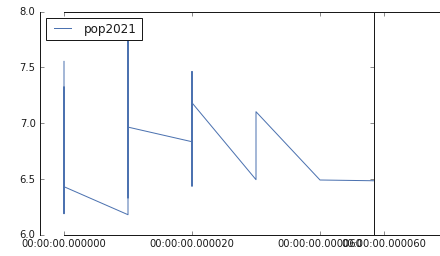

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y1)
plt.legend(stocks.columns[1:], ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [ ]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  fig.canvas.print_figure(bytes_io, **kw)


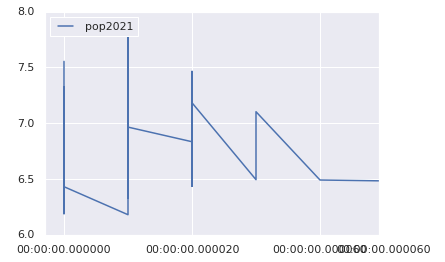

In [ ]:
# same plotting code as above!
plt.plot(x, y1)
plt.legend(stocks.columns[1:], ncol=2, loc='upper left');

Ah, much better!

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

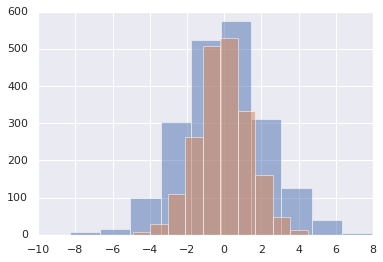

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

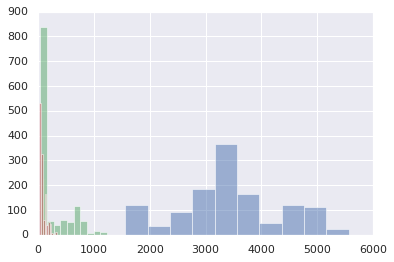

In [ ]:
for x in stocks.columns[1:]:
    plt.hist(stocks[x], alpha=0.5)

We can see that the stocks vary across vastly different price ranges. Therefore we need to normalise them first.

# Normalisation
## Min-max
The easist way to normalise is to make the smallest value `0` and the largest value `1`.

In [ ]:
wizz_max=stocks['WIZZL'].max()
wizz_min=stocks['WIZZL'].min()
wizz_range=wizz_max-wizz_min
wizz_max,wizz_min,wizz_range

(5565.0, 1560.0, 4005.0)

In [ ]:
stocks['WIZZL_minmax_norm']=(stocks['WIZZL']-wizz_min)/wizz_range

In [ ]:
wizz_max=stocks['WIZZL_minmax_norm'].max()
wizz_min=stocks['WIZZL_minmax_norm'].min()
wizz_range=wizz_max-wizz_min
wizz_max,wizz_min,wizz_range

(1.0, 0.0, 1.0)

Let's do it for all columns!

In [ ]:
for x in stocks.columns[1:5]:
  x_max=stocks[x].max()
  x_min=stocks[x].min()
  x_range=x_max-x_min
  stocks[x+'_minmax_norm']=(stocks[x]-x_min)/x_range

In [ ]:
stocks.head(2)

,Date,WIZZL,RYAAY,TSLA,NVDA,WIZZL_minmax_norm,RYAAY_minmax_norm,TSLA_minmax_norm,NVDA_minmax_norm
0,2016-11-28,1676.0,82.300003,39.223999,23.224274,0.028964,0.439379,0.002872,0.005180
1,2016-11-29,1693.0,82.339996,37.914001,23.012041,0.033208,0.439884,0.001775,0.004492


In [ ]:
stocks.columns[-4:]

Index(['WIZZL_minmax_norm', 'RYAAY_minmax_norm', 'TSLA_minmax_norm',
       'NVDA_minmax_norm'],
      dtype='object')

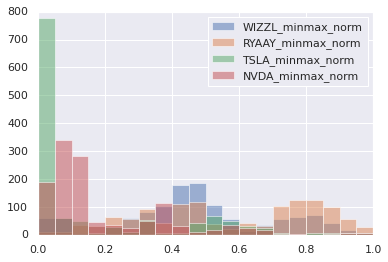

In [ ]:
for x in stocks.columns[-4:]:
    plt.hist(stocks[x], alpha=0.5,bins=20)
    plt.legend(stocks.columns[-4:])

We forgot to look at the stock values, now in the normalised form:

In [ ]:
stock_stack=stocks.set_index('Date').stack().reset_index()
stock_stack.columns=['Date','Stock','Value']
stock_stack['Date']=pd.to_datetime(stock_stack['Date'])
stock_stack=stock_stack[stock_stack['Stock'].str.contains('minmax_norm')]
stock_stack.head()

,Date,Stock,Value
4,2016-11-28,WIZZL_minmax_norm,0.028964
5,2016-11-28,RYAAY_minmax_norm,0.439379
6,2016-11-28,TSLA_minmax_norm,0.002872
7,2016-11-28,NVDA_minmax_norm,0.005180
16,2016-11-29,WIZZL_minmax_norm,0.033208


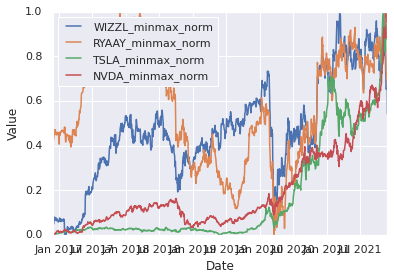

In [ ]:
sns.lineplot(x='Date', y='Value', hue='Stock', 
             data=stock_stack,legend=False);
plt.legend(stock_stack['Stock'].unique(),loc=2);

## Z-score

$Z=(x-\mu)/\sigma $

In [ ]:
for x in stocks.columns[1:5]:
  stocks[x+'_z_norm']= (stocks[x] - stocks[x].mean())/stocks[x].std()

In [ ]:
stock_stack=stocks.set_index('Date').stack().reset_index()
stock_stack.columns=['Date','Stock','Value']
stock_stack['Date']=pd.to_datetime(stock_stack['Date'])
stock_stack=stock_stack[stock_stack['Stock'].str.contains('z_norm')]
stock_stack.head()

,Date,Stock,Value
8,2016-11-28,WIZZL_z_norm,-1.938549
9,2016-11-28,RYAAY_z_norm,-0.538238
10,2016-11-28,TSLA_z_norm,-0.689331
11,2016-11-28,NVDA_z_norm,-0.982740
20,2016-11-29,WIZZL_z_norm,-1.919827


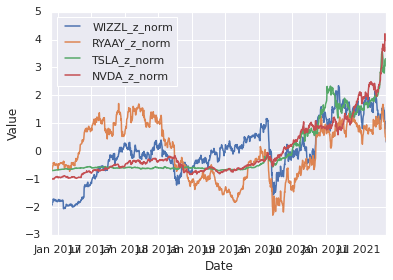

In [ ]:
sns.lineplot(x='Date', y='Value', hue='Stock', 
             data=stock_stack,legend=False);
plt.legend(stock_stack['Stock'].unique(),loc=2)

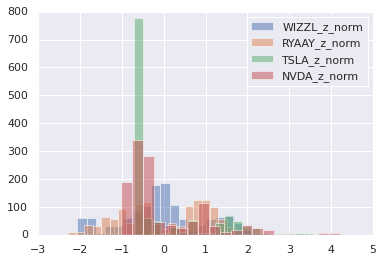

In [ ]:
for x in stocks.columns[-4:]:
    plt.hist(stocks[x], alpha=0.5,bins=20)
    plt.legend(stocks.columns[-4:])

# KDE

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

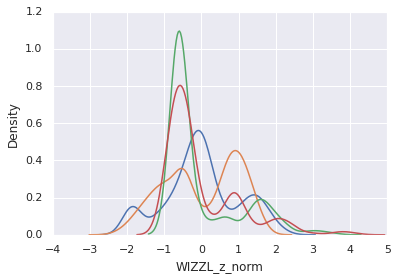

In [ ]:
for x in stocks.columns[-4:]:
    sns.kdeplot(stocks[x])

Histograms and KDE can be combined using `displot`:

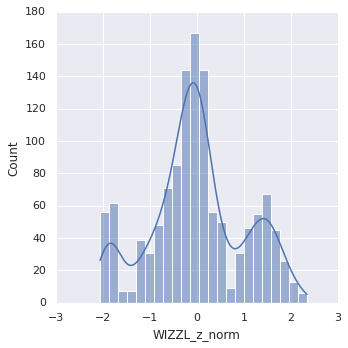

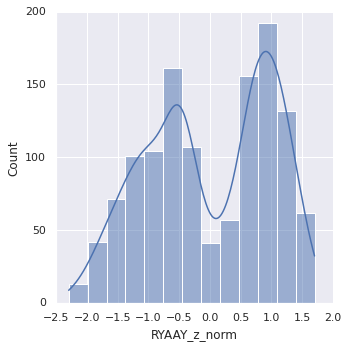

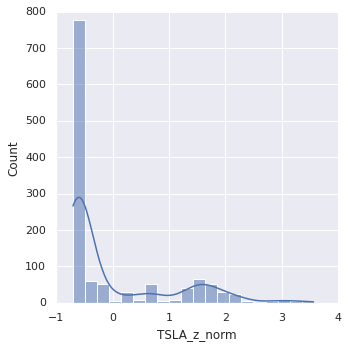

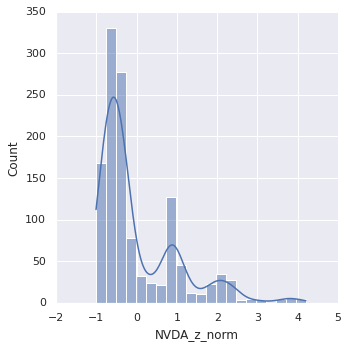

In [ ]:
for x in stocks.columns[-4:]:
    sns.displot(stocks[x],kde=True)

2-dimensional distributions

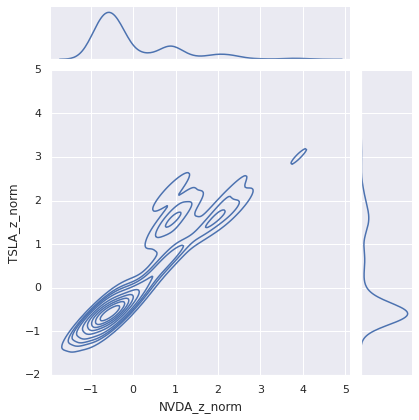

In [ ]:
sns.jointplot(x="NVDA_z_norm", y="TSLA_z_norm", data=stocks, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

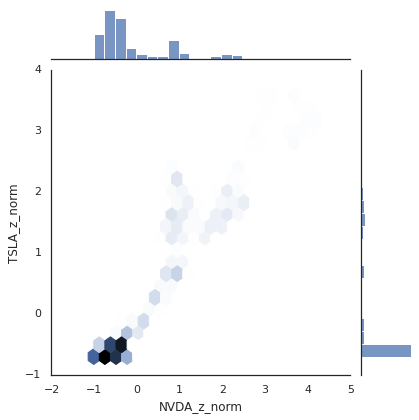

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="NVDA_z_norm", y="TSLA_z_norm", data=stocks, kind='hex');

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" height="200px">
<img src="https://ytu-cvlab.github.io/mce-51069/images/copied_from_nb/images/sepal_petal.jpg" height="200px">

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

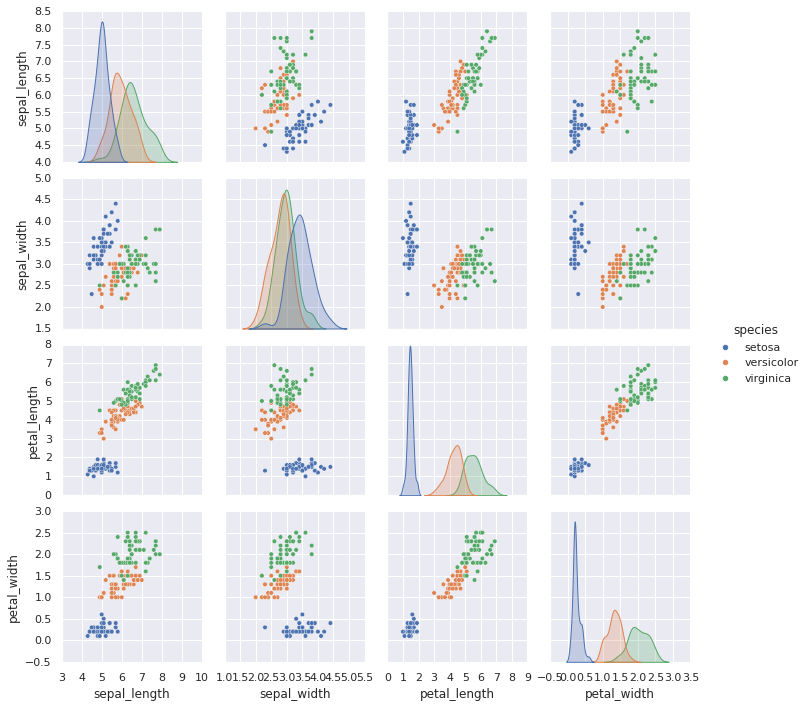

In [ ]:
sns.pairplot(iris, hue='species', height=2.5);

Now with the stocks

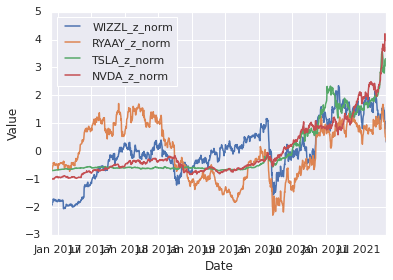

In [ ]:
sns.lineplot(x='Date', y='Value', hue='Stock', 
             data=stock_stack,legend=False);
plt.legend(stock_stack['Stock'].unique(),loc=2)

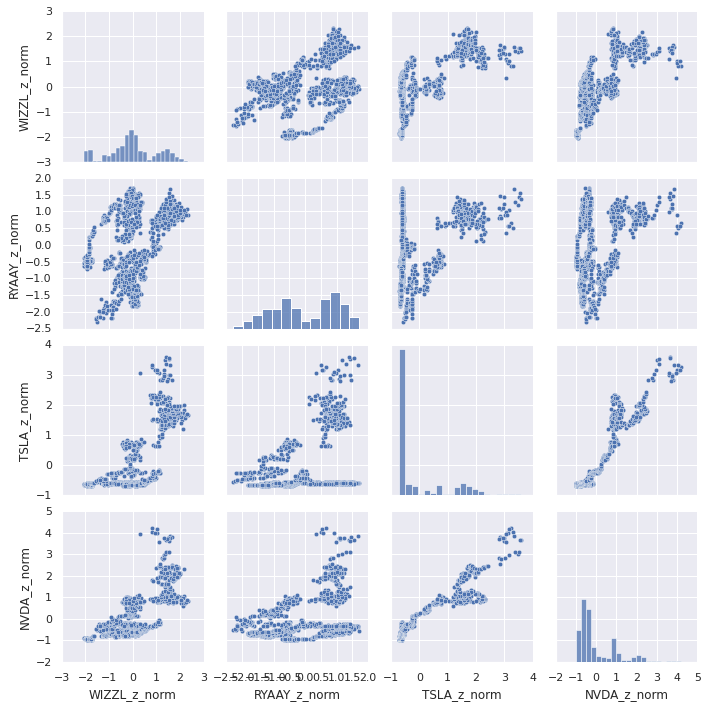

In [ ]:
sns.pairplot(stocks[stocks.columns[-4:]], height=2.5);

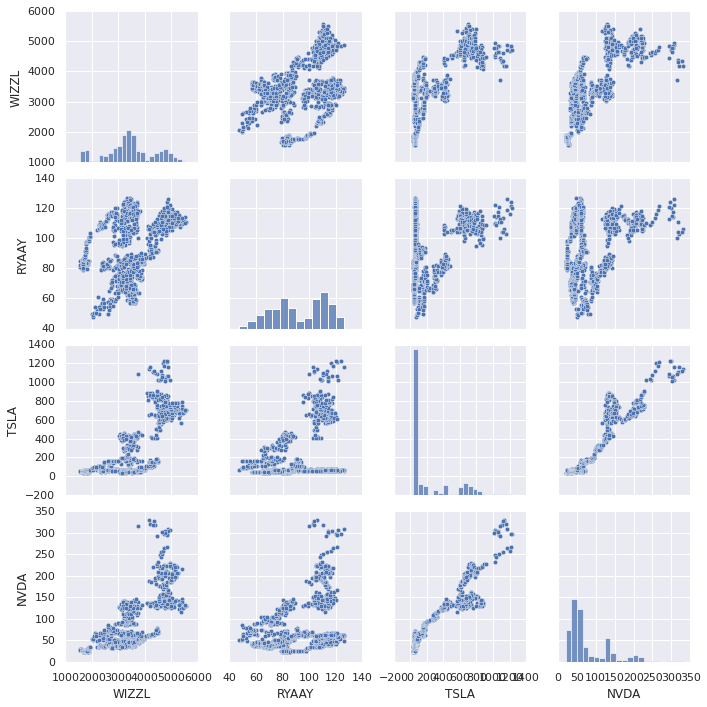

In [ ]:
sns.pairplot(stocks[stocks.columns[1:5]], height=2.5);

# Regression

Can we use the _TSLA_ stock price to predict _NVDA_? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

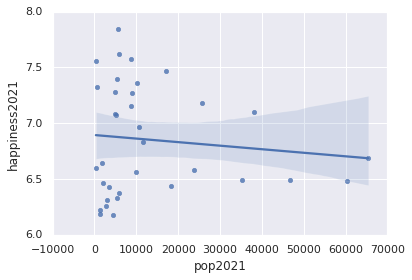

In [ ]:
sns.regplot(x='pop2021',y='happiness2021',data=stocks)

But what are the regression parameters?

In [ ]:
from scipy.stats import linregress

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=stocks.dropna()['pop2021'], y=stocks.dropna()['happiness2021'])

In [ ]:
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  -0.0  * x +  6.89
R² =  0.01


explaning factor- variation in the x factor explains the variation in y 89% of the times

In [ ]:
np.corrcoef(stocks.dropna()['pop2021'], stocks.dropna()['happiness2021'])

array([[ 1.        , -0.10884119],
       [-0.10884119,  1.        ]])

In [ ]:
rvalue

-0.10884118712637039